# Nikkei High Dividend Yield 50 Analysis with Portfolio Optimizer



## Initialization

If you are using CoLab, first install the dependency PyPortfolioOpt

In [1]:
!pip install git+https://github.com/robertmartin8/PyPortfolioOpt.git

  Cloning https://github.com/robertmartin8/PyPortfolioOpt.git to /tmp/pip-req-build-ts015ivg
  Running command git clone -q https://github.com/robertmartin8/PyPortfolioOpt.git /tmp/pip-req-build-ts015ivg
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 2.8 MB 5.1 MB/s 
  Created wheel for pyportfolioopt: filename=pyportfolioopt-1.5.2-py3-none-any.whl size=61368 sha256=9ac09aebd21807c4bbbdb226162fae6f28be592d409c60bb3315ada54cd52c78
  Stored in directory: /tmp/pip-ephem-wheel-cache-wt7v68uv/wheels/d0/b4/20/a9c62513c6166350c6dfdea774d9f81a018001524956fdb96e
Successfully built pyportfolioopt
  Attempting uninstall: cvxpy
    Found existing installation: cvxpy 1.0.31
    Uninstalling cvxpy-1.0.31:
      Successfully uninstalled cvxpy-1.0.31


Then get our PortfolioOptimizer library and the necessary datasets from our repository

In [2]:
!wget https://raw.githubusercontent.com/cartasuzuki/phynance/master/PortfolioOptimizer.py

--2022-03-31 21:05:23--  https://raw.githubusercontent.com/cartasuzuki/phynance/master/PortfolioOptimizer.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2691 (2.6K) [text/plain]
Saving to: ‘PortfolioOptimizer.py’

PortfolioOptimizer. 100%[===================>]   2.63K  --.-KB/s    in 0s      

2022-03-31 21:05:23 (51.9 MB/s) - ‘PortfolioOptimizer.py’ saved [2691/2691]



Import libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from PortfolioOptimizer import PortfolioOptimizer

In [4]:
stock_symbols = pd.read_csv('https://raw.githubusercontent.com/cartasuzuki/phynance/master/datasets/nikkei_high_dividend_yield_50_weight_en.csv')

Once we have loaded our stock symbols dataset we can either use the prices in the csv file or download prices from alphadvantage to get updated data.

### Filter out some stocks from the index

Chose a minimum div/yield. Set to 0 if you want to use all stocks in the index

In [5]:
min_yield = 3.5

In [56]:
selected_stocks = stock_symbols[stock_symbols['Dividend']>min_yield]

Create a filter string (highDivString) to be used later to filter stocks with lower yield than min_yield

In [39]:
highDivString = selected_stocks['Code'].values.astype(int)
highDivString = highDivString.astype(str)
string = '.TOK'
#highDivString = [x + string for x in highDivString]

### Method 1: use csv file

Read the stock prices from the csv provided in our repository

In [10]:
#stocks = pd.read_csv('https://raw.githubusercontent.com/cartasuzuki/phynance/master/datasets/nikkei50.csv', index_col= ['timestamp'], parse_dates= ['timestamp'])
#stocks = pd.read_csv('https://raw.githubusercontent.com/cartasuzuki/phynance/master/datasets/nikkei_high_dividend_yield_50_prices.csv', index_col= ['timestamp'], parse_dates= ['timestamp'])

stocks = pd.read_csv('https://raw.githubusercontent.com/cartasuzuki/PyInvest/master/data/nikkei50.csv', index_col= ['date'], parse_dates= ['date'])

In [ ]:
highDivString

array(['2768', '2914', '4061', '4183', '4188', '4208', '4502', '4902',
       '5020', '5108', '5214', '5703', '6113', '6178', '6301', '6471',
       '6472', '7201', '7267', '7270', '7751', '8002', '8031', '8053',
       '8058', '8304', '8306', '8308', '8316', '8354', '8411', '8601',
       '8628', '8725', '8766', '9412', '9437'], dtype='<U21')

If you want higher yield filter out using the filter previously created

In [11]:
stocks = stocks[highDivString]

In [12]:
stocks = stocks.replace(',','', regex=True)
cols=[i for i in stocks.columns if i not in ["timestamp"]]

for col in cols:
    stocks[col]=pd.to_numeric(stocks[col])

In [13]:
stocks.head()

,2768,2914,4061,4183,4188,4208,4502,4902,5020,5108,...,8308,8316,8354,8411,8601,8628,8725,8766,9412,9437
date,,,,,,,,,,,,,,,,,,,,,
2022-03-28,2099,2119.5,3530,3125,841.3,2076,3581.0,536,489.8,4649.0,...,553.6,4119.0,2484,1655.5,721.0,845,4211.0,7395,428,3880.0
2022-03-25,2102,2091.0,3550,3195,846.2,2077,3612.0,533,475.9,4624.0,...,546.5,4173.0,2459,1640.5,718.9,844,4173.0,7325,427,3880.0
2022-03-24,2081,2089.5,3530,3140,824.8,2069,3631.0,531,473.4,4631.0,...,546.8,4251.0,2444,1649.0,717.7,844,4231.0,7474,429,3880.0
2022-03-23,2075,2095.5,3525,3125,828.2,2081,3620.0,529,474.6,4575.0,...,556.7,4233.0,2488,1654.5,744.0,856,4232.0,7470,429,3880.0
2022-03-22,2076,2064.0,3480,3090,821.2,2050,3596.0,523,469.5,4547.0,...,556.1,4159.0,2453,1628.5,719.6,852,4163.0,7513,428,3880.0


## Portfolio Optimization

In [40]:


weights, sharpe, ret = PortfolioOptimizer.optimize_portfolio(stocks,0,0.25)

8002: 11.0%
8031: 25.0%
8058: 24.0%
8766: 16.0%
9437: 25.0%
Sharpe: 0.53
Exp. Return: 11.52


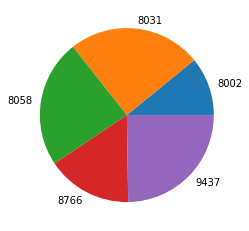

In [41]:
PortfolioOptimizer.print_portfolio_result(weights, sharpe, ret)
PortfolioOptimizer.portfolioAsPieChart(weights)

Average yield

In [ ]:
selected_stocks

In [58]:
selected_stocks['Dividend'].mean()

4.397297297297298

In [ ]:
weights

Remove 0s and TOK string.

In [60]:
www ={x:y for x,y in weights.items() if y>0.001}
portfolio =list(www.keys())
portfoliovalues = list(www.values())

portfolio

['8002', '8031', '8058', '8766', '9437']

### Resulting Portfolio

In [82]:
portolio_stocks = selected_stocks[selected_stocks['Code'].isin(portfolio)]


In [83]:
portolio_stocks

,Date of Data,Code,Company Name,Nikkei Industrial Classification,Weight,Dividend
27,2018/11/30,8002,MARUBENI CORP.,Trading Companies,2.5729%,4.26
28,2018/11/30,8031,"MITSUI & CO., LTD.",Trading Companies,2.7195%,4.11
31,2018/11/30,8058,MITSUBISHI CORP.,Trading Companies,3.0817%,4.38
44,2018/11/30,8766,"TOKIO MARINE HOLDINGS, INC.",Insurance,2.9531%,3.60
47,2018/11/30,9437,"NTT DOCOMO, INC.",Communications,2.9280%,3.80


In [87]:
Div_Yield = np.average(portolio_stocks['Dividend'])
round(Div_Yield, 2)

4.03

In [81]:
portfolio = list(map(int, portfolio))
portfolio

[8002, 8031, 8058, 8766, 9437]

In [80]:
for item in [selected_stocks['Code'], 'string', None]:
    print type(item)

SyntaxError: ignored